Datos

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

aca = pd.read_csv("./DatosAcademicos.csv", encoding="latin1")
aca.head()

,Académico,Artículos Publicados 2020,Artículos Publicados 2021,Artículos Publicados 2022,Artículos Publicados 2023,Artículos Aceptados 2020,Artículos Aceptados 2021,Artículos Aceptados 2022,Artículos Aceptados 2023,Artículos en Repositorios 2020,...,Artículos en Memorias 2022,Artículos en Memorias 2023,Cursos Posgrado 2020,Cursos Posgrado 2021,Cursos Posgrado 2022,Cursos Posgrado 2023,Cursos Licenciatura 2020,Cursos Licenciatura 2021,Cursos Licenciatura 2022,Cursos Licenciatura 2023
0,A,2,0,0,1,0,0,0,0,0,...,0,0,2,2,2,2,0,0,0,0
1,B,3,2,0,0,0,2,1,0,0,...,0,1,0,2,1,1,0,0,0,0
2,C,2,3,1,4,0,1,0,0,0,...,0,0,2,2,2,2,2,2,2,0
3,D,2,2,1,1,1,0,0,0,0,...,0,0,4,1,2,1,0,1,1,1
4,E,6,4,5,7,0,0,3,0,0,...,0,2,2,2,2,0,0,0,0,0


Primero clasificamos por año y despues eliminamos los años dentro de las columnas para que se vea de una mejor manera y no se este repitiendo por cada grafica y columna

In [2]:
# Año 2022
a_2020 = ['Académico'] + [col for col in aca.columns if '2020' in col]
df_2020 = aca[a_2020] 

df_2020.columns = df_2020.columns.str.replace(r'\s\d{4}$', '', regex=True)
df_2020 = df_2020.set_index('Académico')
# Año 2021
a_2021 = ['Académico'] + [col for col in aca.columns if '2021' in col]
df_2021 = aca[a_2021] 
df_2021.columns = df_2021.columns.str.replace(r'\s\d{4}$', '', regex=True)
df_2021 = df_2021.set_index('Académico')
#Año 2022
a_2022 = ['Académico'] + [col for col in aca.columns if '2022' in col]
df_2022 = aca[a_2022] 
df_2022.columns = df_2022.columns.str.replace(r'\s\d{4}$', '', regex=True)
df_2022 = df_2022.set_index('Académico')
#Año 2023
a_2023 = ['Académico'] + [col for col in aca.columns if '2023' in col]
df_2023 = aca[a_2023] 
df_2023.columns = df_2023.columns.str.replace(r'\s\d{4}$', '', regex=True)  
df_2023 = df_2023.set_index('Académico') 

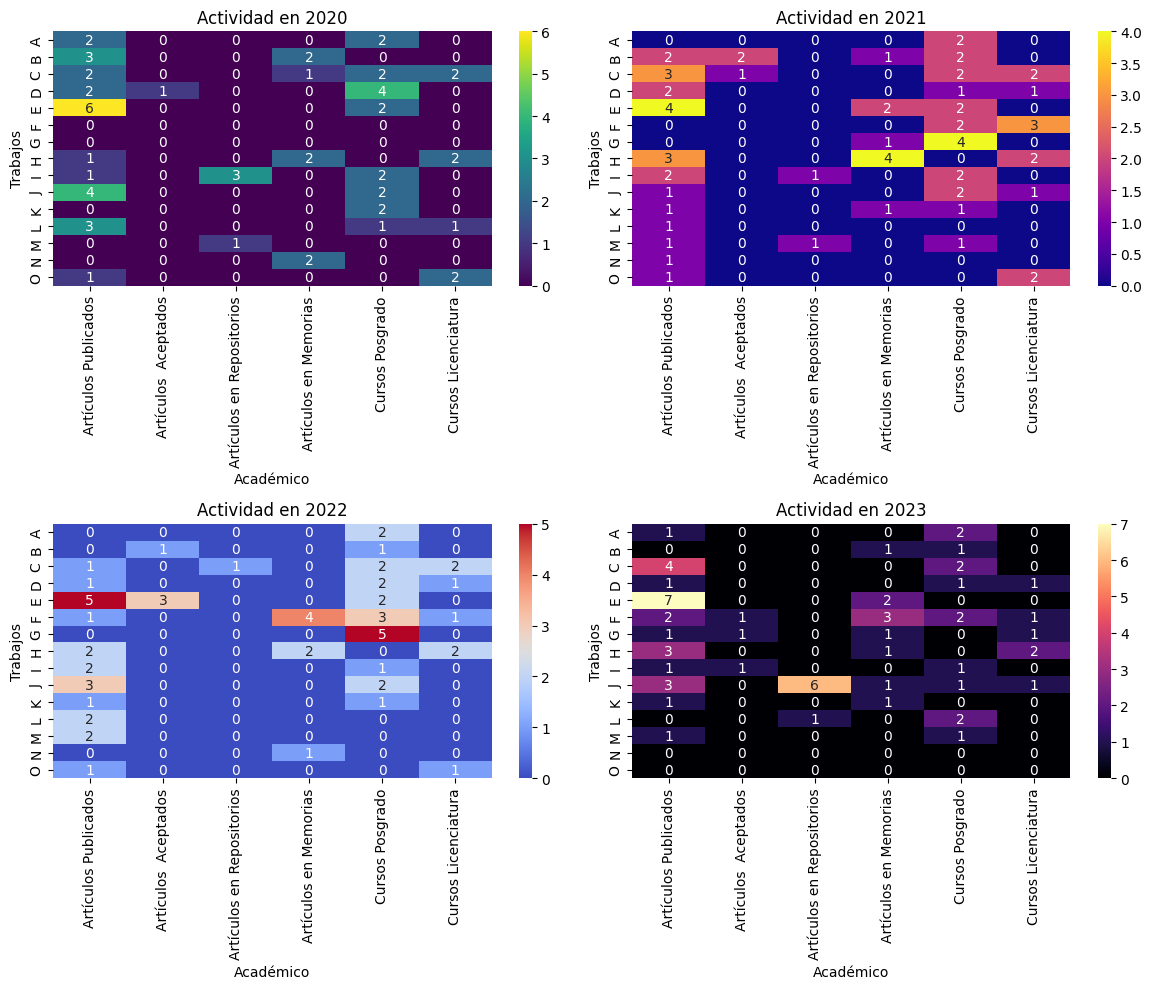

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
#Año 2020
sns.heatmap(df_2020, annot=True, cmap='viridis', fmt='d', ax=axes[0,0])
axes[0,0].set_title('Actividad en 2020')
axes[0,0].set_xlabel('Académico')
axes[0,0].set_ylabel('Trabajos')
# AÑo 2021
sns.heatmap(df_2021, annot=True, cmap='plasma', fmt='d', ax=axes[0,1])
axes[0,1].set_title('Actividad en 2021')
axes[0,1].set_xlabel('Académico')
axes[0,1].set_ylabel('Trabajos')
# Año 2022
sns.heatmap(df_2022, annot=True, cmap='coolwarm', fmt='d', ax=axes[1,0])
axes[1,0].set_title('Actividad en 2022')
axes[1,0].set_xlabel('Académico')
axes[1,0].set_ylabel('Trabajos')
# Año 2023
sns.heatmap(df_2023, annot=True, cmap='magma', fmt='d', ax=axes[1,1])
axes[1,1].set_title('Actividad en 2023')
axes[1,1].set_xlabel('Académico')
axes[1,1].set_ylabel('Trabajos')

plt.tight_layout()
plt.show()

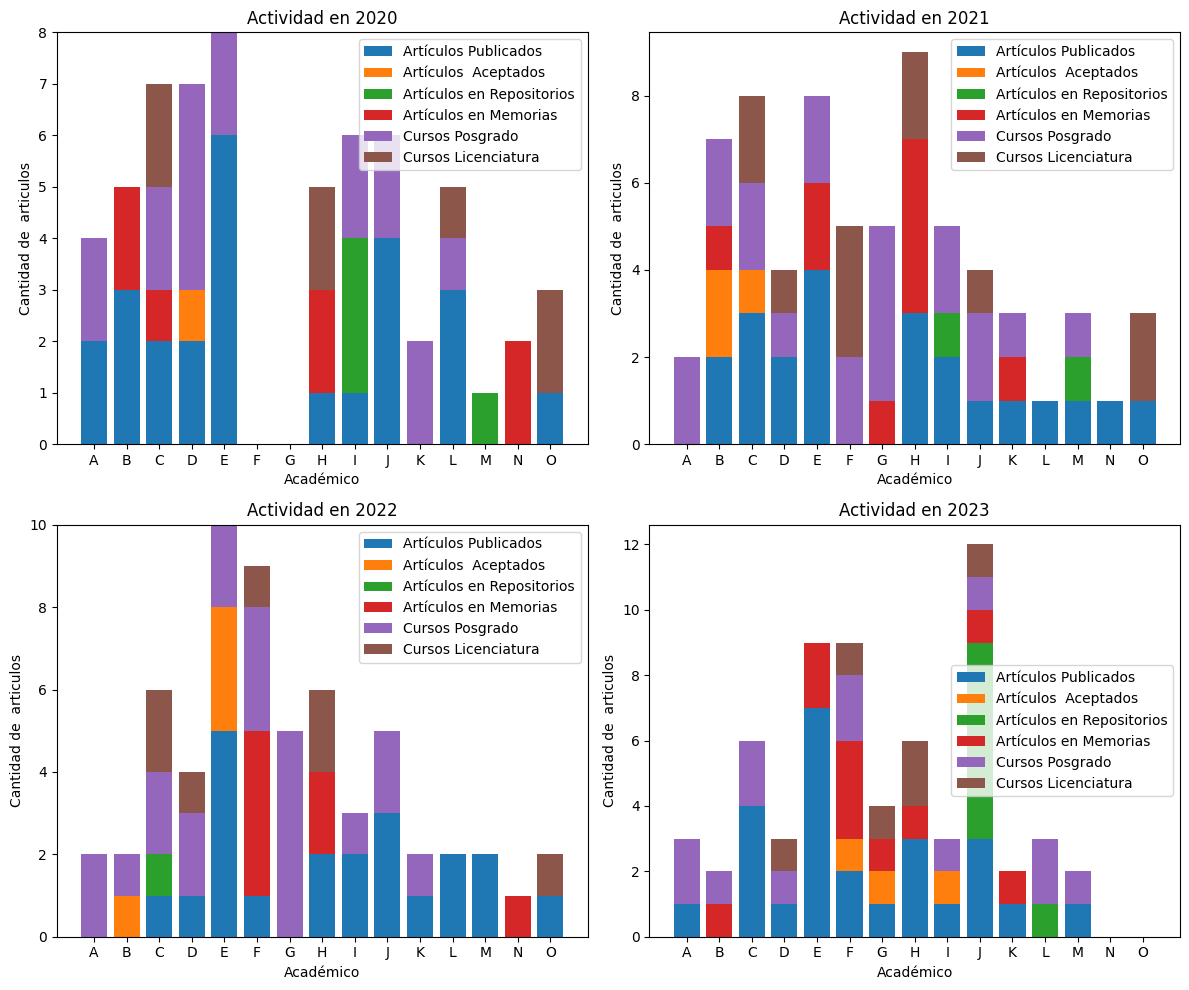

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

def crear_barras_apiladas(ax, df, año):
    """
    Crea un gráfico de barras apiladas en el eje proporcionado.
    
    Parámetros:
    ax : matplotlib.axes.Axes
        Objeto de ejes donde se dibujará el gráfico.
    df : pandas.DataFrame
        DataFrame donde:
        - Las filas representan diferentes categorías.
        - Las columnas representan diferentes métricas a apilar.
    año : str
        Año que se mostrará en el título del gráfico.

    Resultado:
    Se genera un gráfico de barras apiladas dentro del eje `ax` con las categorías en el eje X (Que son los academicos)y las métricas acumuladas en el eje Y(los articulos publicados por los academicos )
    """
    categorias = df.index  
    metricas = df.columns  
    bottom = np.zeros(len(categorias))  
    for i, metrica in enumerate(metricas):
        ax.bar(categorias, df[metrica], label=metrica, bottom=bottom)
        bottom += df[metrica]  # Fondo para la metrica
    ax.set_title(f'Actividad en {año}')
    ax.set_xlabel('Académico')
    ax.set_ylabel('Cantidad de  articulos')
    ax.legend()

# Año 2020
crear_barras_apiladas(axes[0, 0], df_2020, '2020')

# Año 2021
crear_barras_apiladas(axes[0, 1], df_2021, '2021')

# Año 2022
crear_barras_apiladas(axes[1, 0], df_2022, '2022')

# Año 2023
crear_barras_apiladas(axes[1, 1], df_2023, '2023')
plt.tight_layout()
plt.show()